In [215]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

import utils

In [216]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib inline  
import matplotlib.pyplot as plt

In [217]:
im1_file = 'CloseupPerson.jfif'
im2_file = 'CloseupTiger.jfif'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

(Text(0.5, 1.0, 'Close Up Man FFT'), [], [])

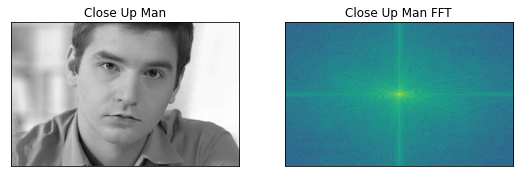

In [218]:
fig, axes = plt.subplots(1, 2,figsize = (9,9))
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Close Up Man'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))))
axes[1].set_title('Close Up Man FFT'),axes[1].set_xticks([]), axes[1].set_yticks([])

(Text(0.5, 1.0, 'Close Up Tiger FFT'), [], [])

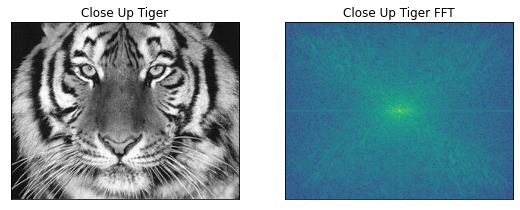

In [219]:
fig, axes = plt.subplots(1, 2,figsize = (9,9))
axes[0].imshow(im2,cmap='gray')
axes[0].set_title('Close Up Tiger'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2)))))
axes[1].set_title('Close Up Tiger FFT'),axes[1].set_xticks([]), axes[1].set_yticks([])

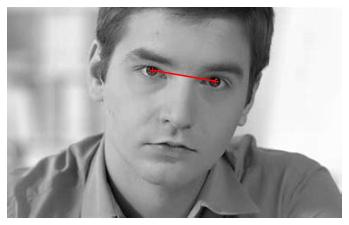

In [220]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[160, 70], [230, 82]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

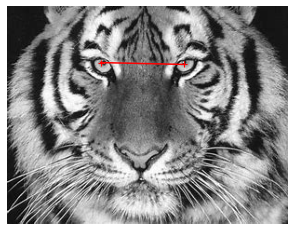

In [221]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[100,60], [190,62]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [222]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [223]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

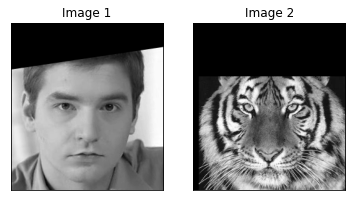

In [224]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [225]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
        #low pass filter = Gaussian
        #High pass filter = Unit Impulse - Gaussian

    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  
    low_pass_gaussian = utils.gaussian_kernel(sigma_low,3*sigma_low)
    high_pass_gaussian = utils.gaussian_kernel(sigma_high,3*sigma_high)
    low_passed_image = cv2.filter2D(im1, -1, low_pass_gaussian)
    high_passed_image = im2 -  cv2.filter2D(im2,-1,high_pass_gaussian)
    hybrid = low_passed_image + high_passed_image 
    return hybrid

def lowPass(im1, sigma_low):
  low_pass_gaussian = utils.gaussian_kernel(sigma_low,3*sigma_low)
  low_passed_image = cv2.filter2D(im1, -1, low_pass_gaussian)
  return low_passed_image

def highPass(im2, sigma_high):
   high_pass_gaussian = utils.gaussian_kernel(sigma_high,3*sigma_high)
   high_passed_image = im2 -  cv2.filter2D(im2,-1,high_pass_gaussian)
   return high_passed_image


In [ ]:
sigma_low = 6 # choose parameters that work for your images
sigma_high = 1

(Text(0.5, 1.0, 'Low Passed Man FFT'), [], [])

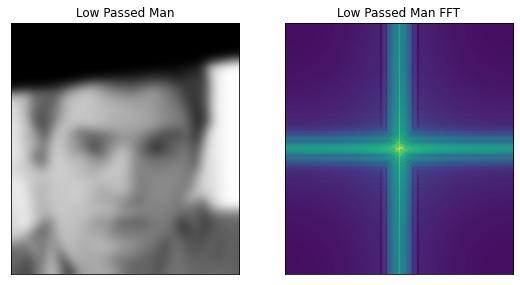

In [226]:
low_passed_image = lowPass(im1, sigma_low)
fig, axes = plt.subplots(1, 2,figsize = (9,9))
axes[0].imshow(low_passed_image,cmap='gray')
axes[0].set_title('Low Passed Man'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_passed_image)))))
axes[1].set_title('Low Passed Man FFT'),axes[1].set_xticks([]), axes[1].set_yticks([])

(Text(0.5, 1.0, 'High Passed Tiger FFT'), [], [])

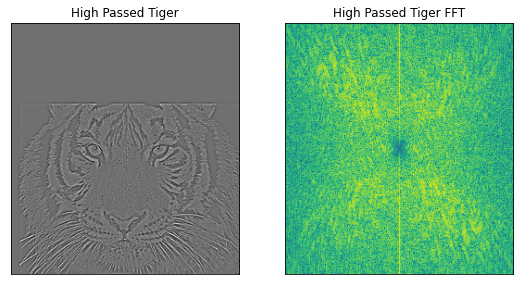

In [227]:
high_passed_image = highPass(im2, sigma_high)
fig, axes = plt.subplots(1, 2,figsize = (9,9))
axes[0].imshow(high_passed_image,cmap='gray')
axes[0].set_title('High Passed Tiger'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_passed_image)))))
axes[1].set_title('High Passed Tiger FFT'),axes[1].set_xticks([]), axes[1].set_yticks([])

(Text(0.5, 1.0, 'Hybrid Image FFT'), [], [])

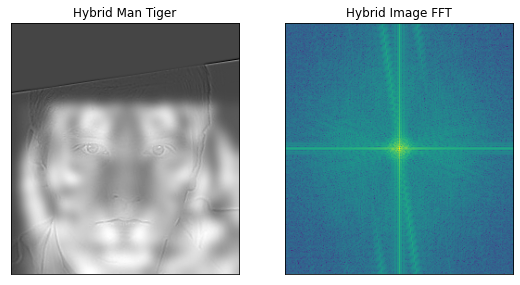

In [195]:
im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)
fig, axes = plt.subplots(1, 2,figsize = (9,9))
axes[0].imshow(im_hybrid,cmap='gray')
axes[0].set_title('Hybrid Man Tiger'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_hybrid)))))
axes[1].set_title('Hybrid Image FFT'),axes[1].set_xticks([]), axes[1].set_yticks([])

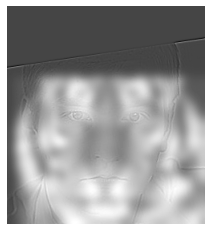

In [209]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement


##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

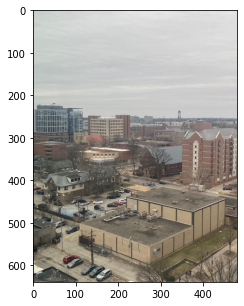

In [231]:
im_blurry_file = 'skyview.jpg'
im_blurry = cv2.imread(im_blurry_file)
im_blurry = cv2.cvtColor(im_blurry, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (5,5))
plt.imshow(im_blurry)

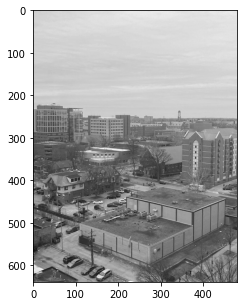

In [138]:
im_blurry_gray = cv2.cvtColor(im_blurry, cv2.COLOR_BGR2GRAY) 
plt.figure(figsize = (5,5))
plt.imshow(im_blurry_gray, cmap = 'gray')

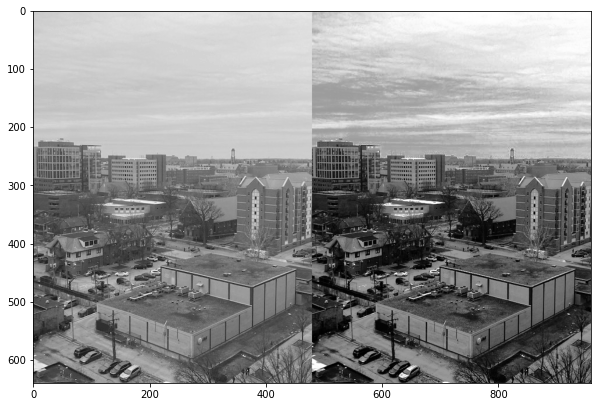

In [139]:
enhanced_blurry_gray = cv2.equalizeHist(im_blurry_gray)
combined = np.hstack((im_blurry_gray,enhanced_blurry_gray))
plt.figure(figsize = (10,10))
plt.imshow(combined, cmap = 'gray')

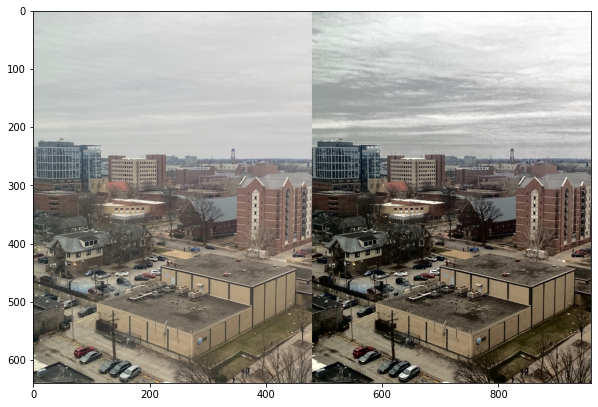

In [140]:

blurry_color = cv2.cvtColor(im_blurry, cv2.COLOR_RGB2YCrCb)
blurry_color[:, :, 0] = cv2.equalizeHist(blurry_color[:, :, 0])

enhanced_blurry = cv2.cvtColor(blurry_color, cv2.COLOR_YCrCb2RGB)
combined = np.hstack((im_blurry,enhanced_blurry))
plt.figure(figsize = (10,10))
plt.imshow(combined)

#### Color enhancement 

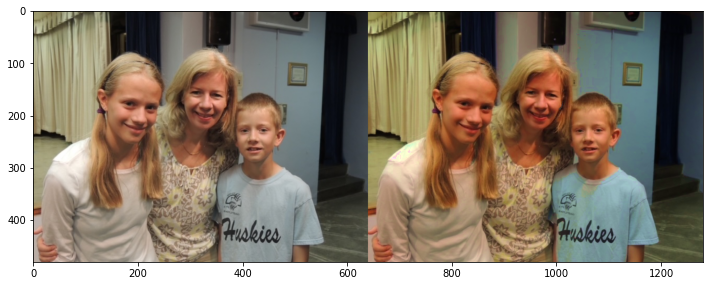

In [210]:
im_dull_file = cv2.imread('young_joe.jpg')
im_dull = cv2.cvtColor(im_dull_file, cv2.COLOR_BGR2RGB)

im_hsv = cv2.cvtColor(im_dull,cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(im_hsv)

scale = 40
s = [sat + scale for sat in s]
new_s = np.clip(s, 0,255)
im_enhanced = cv2.merge([h,new_s, v])
im_enhanced = cv2.cvtColor(im_enhanced, cv2.COLOR_HSV2RGB)

combined = np.hstack((im_dull, im_enhanced))
plt.figure(figsize = (12,12))
plt.imshow(combined)

#### Color shift


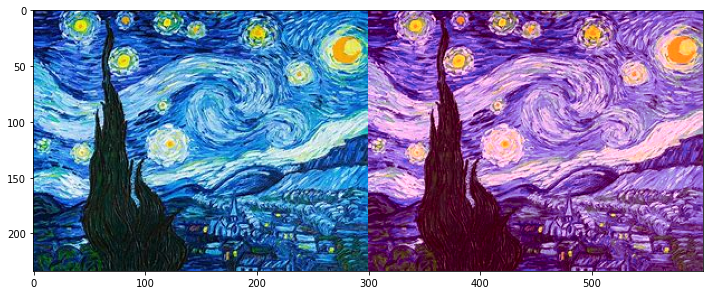

In [212]:
im_shift = cv2.imread('starry_night.jfif')
im_lab = cv2.cvtColor(im_shift,cv2.COLOR_BGR2LAB)
im_shift = cv2.cvtColor(im_shift, cv2.COLOR_BGR2RGB)
l,a,b = cv2.split(im_lab)

#Make the image more red
scale = 40
new_a = [value + scale for value in a]
new_a = np.clip(new_a, 0,175)
im_red = cv2.merge([l,new_a, b])
im_red = cv2.cvtColor(im_red, cv2.COLOR_LAB2RGB)
combined = np.hstack((im_shift, im_red))
plt.figure(figsize = (12,12))
plt.imshow(combined)


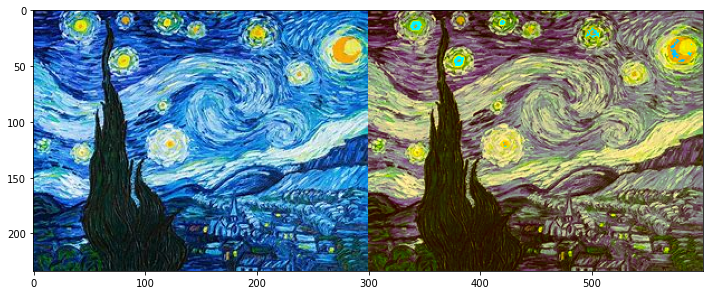

In [211]:
#Make the image more yellow
l2,a2,b2 = cv2.split(im_lab)
scale = 50
new_b2 = [value + scale for value in b2]
new_b2 = np.clip(new_b2, 0,250)
im_yellow = cv2.merge([l2,a2, new_b2])
im_yellow = cv2.cvtColor(im_yellow, cv2.COLOR_LAB2RGB)
combined = np.hstack((im_shift, im_yellow))
plt.figure(figsize = (12,12))
plt.imshow(combined)